<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Breast_Cancer_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [6]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
df.duplicated().sum()

234

<Figure size 1000x1000 with 0 Axes>

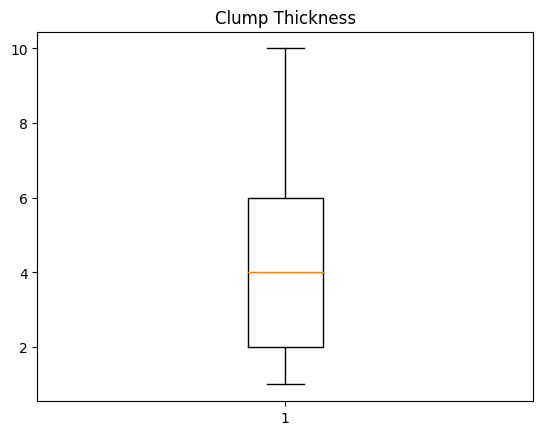

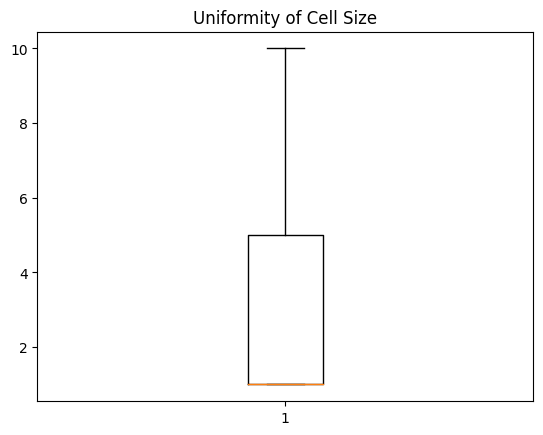

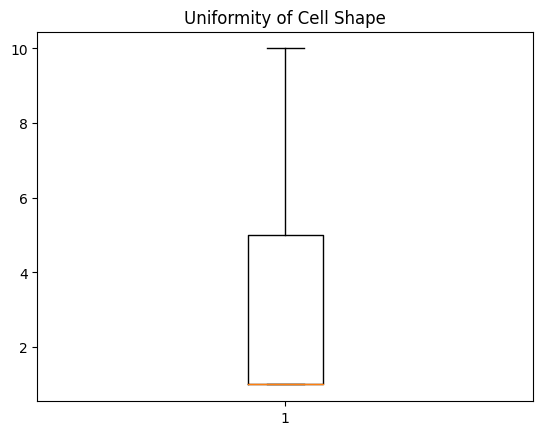

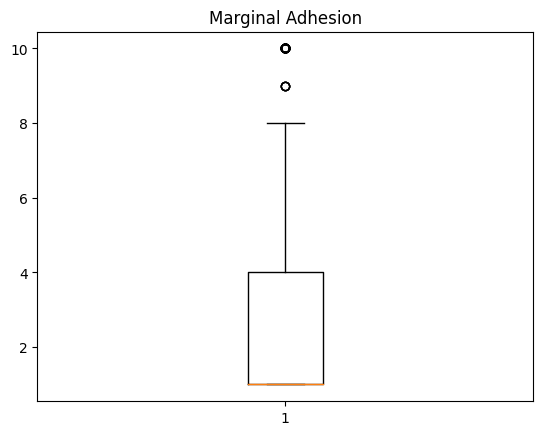

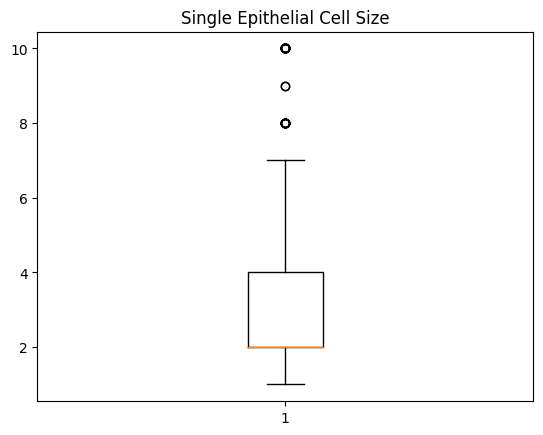

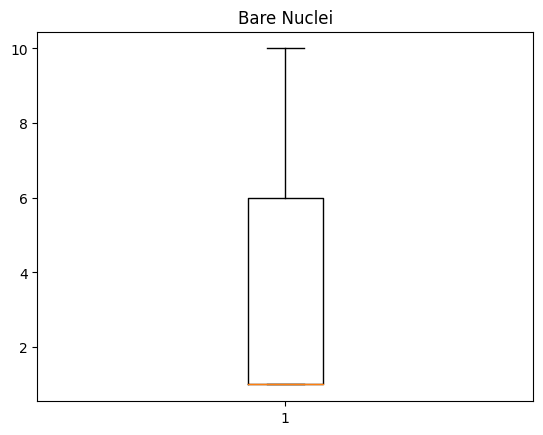

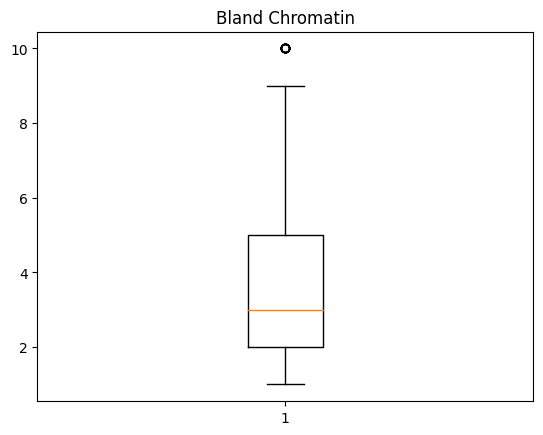

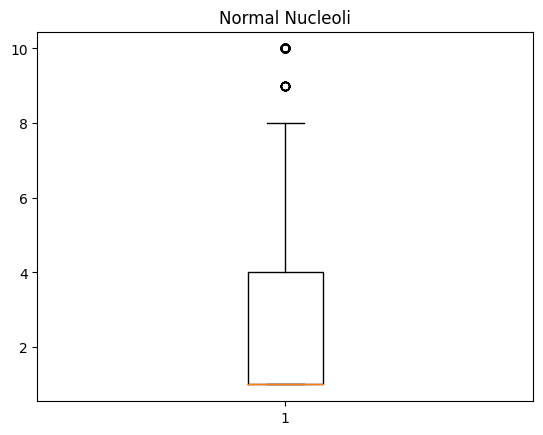

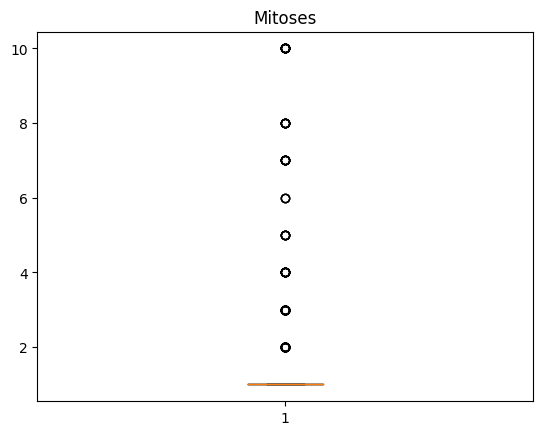

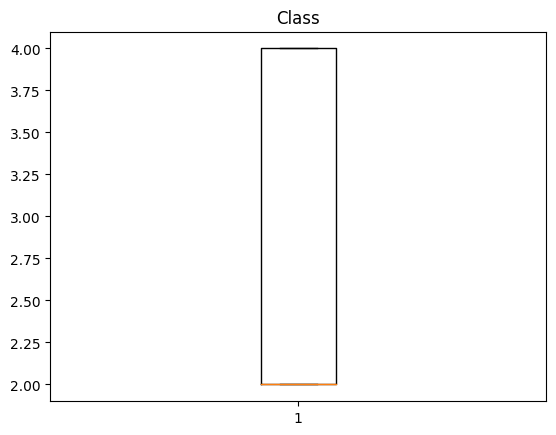

In [8]:
plt.figure(figsize=(10,10))
for i in df.columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [9]:
df.shape

(683, 10)

<ipython-input-10-564d027a3c31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Marginal Adhesion'])


<Axes: xlabel='Marginal Adhesion', ylabel='Density'>

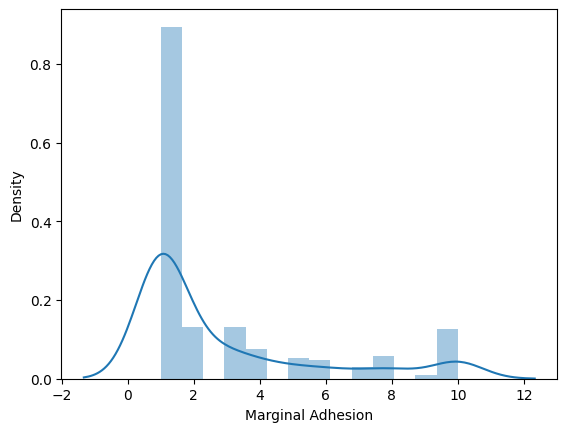

In [10]:
sns.distplot(df['Marginal Adhesion'])

In [11]:
max_threshold=df['Marginal Adhesion'].quantile(0.95)
max_threshold

10.0

In [12]:
len(df[df['Marginal Adhesion']>max_threshold])

0

In [13]:
df1=df[df['Marginal Adhesion']<max_threshold]

In [14]:
df1.shape

(628, 10)

<ipython-input-15-897aa6a10dda>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Mitoses'])


<Axes: xlabel='Mitoses', ylabel='Density'>

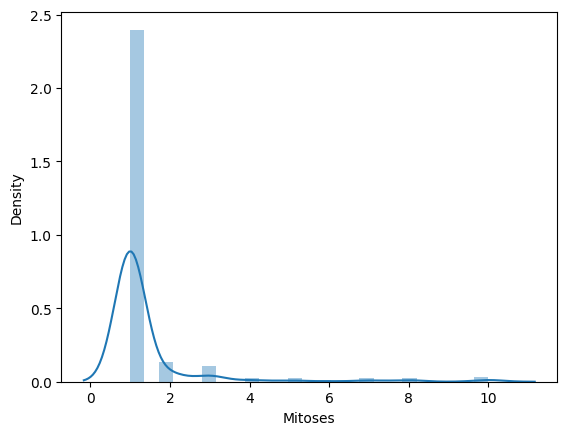

In [15]:
sns.distplot(df1['Mitoses'])

<Axes: >

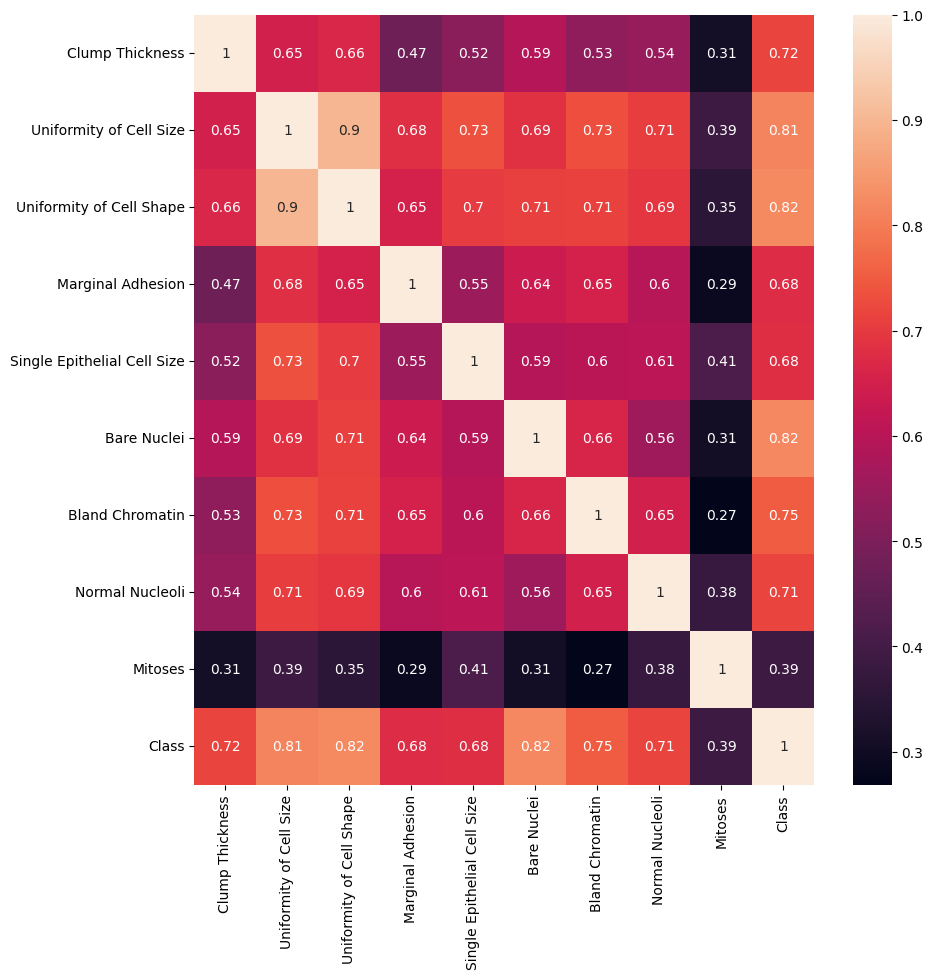

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

In [17]:
x=df1.drop(['Class'],axis=1)
y=df1['Class']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [19]:
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

502 126
502 126


In [20]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [21]:
lr_model.fit(x_train,y_train)
prediction=lr_model.predict(x_test)
lr_model.score(x_test,y_test)

0.9682539682539683

array([[90,  3],
       [ 1, 32]])

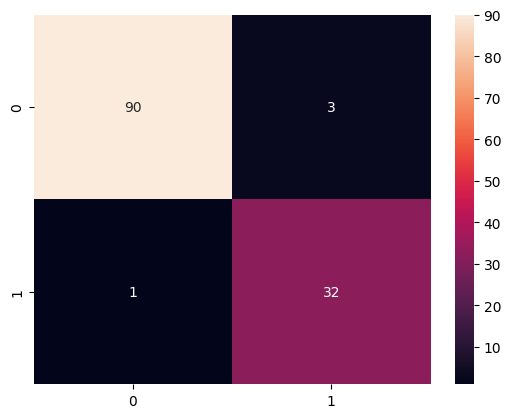

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
cm

In [23]:
from sklearn.metrics import classification_report
clr=classification_report(y_test,prediction)
print(clr)

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        93
           4       0.91      0.97      0.94        33

    accuracy                           0.97       126
   macro avg       0.95      0.97      0.96       126
weighted avg       0.97      0.97      0.97       126



In [24]:
prediction

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4])

In [25]:
prediction_train=lr_model.predict(x_train)

In [26]:
val=np.array([2	,1	,1	,1	,2	,1	,2	,1	,1])
val=val.reshape(1,-1)
single_pre=lr_model.predict(val)
print(single_pre)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
df1.sample()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
33,3,1,2,1,2,1,2,1,1,2


In [28]:
0

0